In [1]:
import pandas as pd


In [3]:
df=pd.read_csv("emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
df.shape

(16000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [15]:
#checking for missing values
df.isna().sum()

text     0
label    0
dtype: int64

In [19]:
df.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

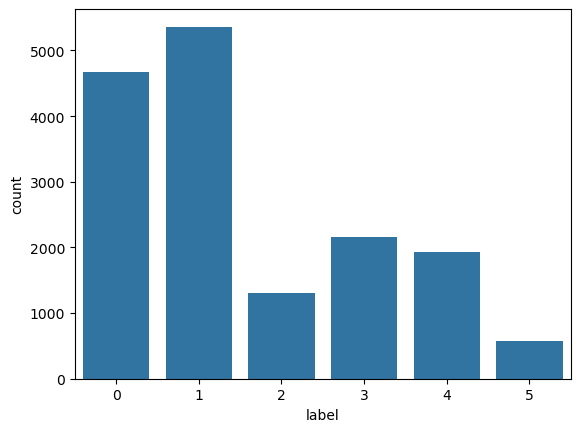

In [35]:
import seaborn as sns
sns.countplot(x= df.label)

In [44]:
df['text']=df['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords
stop=stopwords.words('englisg')
df['text']=df['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

OSError: No such file or directory: 'C:\\Users\\madhu\\AppData\\Roaming\\nltk_data\\corpora\\stopwords\\englisg'

In [56]:

!pip install textblob



In [92]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text']=df['text'].apply(lambda x :" V".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0                           i Vdidnt Vfeel Vhumiliated
1    i Vcan Vgo Vfrom Vfeeling Vso Vhopeless Vto Vs...
2    im Vgrabbing Va Vminute Vto Vpost Vi Vfeel Vgr...
3    i Vam Vever Vfeeling Vnostalgic Vabout Vthe Vf...
4                              i Vam Vfeeling Vgrouchy
Name: text, dtype: object

In [93]:
X=df[['text']]
y=df[['text']]
      

In [97]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
print(x_train.shape,y_train.shape)

In [99]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(12800, 1) (3200, 1)
(12800, 1) (3200, 1)


In [103]:
from sklearn.feature_extraction.text import TfidVectorizer
tfid=TfidVectorize()
tfidf.fit(df['text'])
xtrain_tfidf=tfidf.transform(x_train['test'])
xtest_tfidf=tfidf.transform(x_test['text'])

ImportError: cannot import name 'TfidVectorizer' from 'sklearn.feature_extraction.text' (C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py)

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(df['text'])
xtrain_tfidf = tfidf.transform(x_train['text'])
xtest_tfidf = tfidf.transform(x_test['text'])


In [110]:
from sklearn.linear_model import PassiveAggressliveClassifier 
from sklearn import metrics
pclf=PassiveAggressifier()
pclf.fit(xtrain_tfidf,y_train)
pred=pclf.predict(xtest_tfidf)
print(metrics.classification_report(y_test,pred))

ImportError: cannot import name 'PassiveAggressliveClassifier' from 'sklearn.linear_model' (C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\linear_model\__init__.py)

In [114]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

# Creating the classifier
pclf = PassiveAggressiveClassifier()

# Fitting the model (assuming you have training data)
pclf.fit(xtrain_tfidf, y_train)

# Making predictions
y_pred = pclf.predict(X_test)

# Evaluating the model
print(metrics.accuracy_score(y_test, y_pred))


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [12800, 3200]